In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [24]:
R = 6730 #Ohm
C = 0.000000002056 #F
errVout = [0.004, 0.004, 0.02, 0.02, 0.02, 0.04, 0.04, 0.04, 0.04]  #Volt
errVin = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]  #Volt
errt = [0.000004, 0.000001, 0.0000004, 0.0000004, 0.0000002, 0.0000001, 0.0000001, 0.00000004, 0.00000004] #s
l = len(errVout)
F = [1000, 5000, 10000, 12000, 15000, 25000, 50000, 75000, 100000]
W = [(2*math.pi*F[i]) for i in range(l)]
Vin = [5.32, 5.4, 5.4, 5.4, 5.4, 5.32, 5.28, 5.28, 5.24]
AvVin = sum(Vin)/len(Vin)
Vinn = [AvVin for i in range(l)]
Vout = [0.456, 2.14, 3.34, 3.64, 3.96, 4.64, 4.92, 4.96, 5.00]

A = [Vout[i]/Vin[i] for i in range(l)]
errA = [A[i]*math.sqrt((errVin[i]/Vinn[i])**2+(errVout[i]/Vout[i])**2) for i in range(l)]
t = [0.000232, 0.000035, 0.0000136, 0.00001, 0.0000070, 0.000003, 0.0000008, 0.00000032, 0.00000004]
phi = [2*math.pi*t[i]/(1/F[i]) for i in range(l)]
errphi = [2*math.pi*(errt[i]/(1/F[i])) for i in range(l)]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#attenuazione
axes[0].scatter(F, A, label='Attenuazione', color='red')
axes[0].set_title('Attenuazione resistore')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)

#fase
axes[1].scatter(F, phi, label='Fase', color='red')
axes[1].set_title('Fase resistore')
axes[1].legend()
axes[1].set_xscale('log')
axes[1].grid(True)
print(A)
print(errA)
print(phi)
print(errphi)

[0.08571428571428572, 0.3962962962962963, 0.6185185185185185, 0.674074074074074, 0.7333333333333333, 0.8721804511278194, 0.9318181818181818, 0.9393939393939393, 0.9541984732824427]
[0.000988888503708805, 0.0030607346600108193, 0.0059330338400214195, 0.006263666542176433, 0.006626995353027261, 0.009962448787324097, 0.010303001551909014, 0.01034156202810156, 0.010459528600798304]
[1.457698991265664, 1.0995574287564276, 0.8545132017764238, 0.7539822368615504, 0.6597344572538565, 0.4712388980384689, 0.2513274122871834, 0.15079644737231007, 0.025132741228718343]
[0.025132741228718346, 0.03141592653589793, 0.02513274122871834, 0.03015928947446201, 0.018849555921538756, 0.015707963267948963, 0.03141592653589793, 0.01884955592153876, 0.025132741228718346]


In [22]:
Fexp = 1/(R*C*2*math.pi)
print("{} Hz".format(Fexp))

11502.227604192227 Hz


In [24]:
def Ar(F, F0):
    return (F / F0) / np.sqrt(1 + (F / F0)**2)
least_squares = LeastSquares(F, A, errA, Ar)
m = Minuit(least_squares, F0 = Fexp)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 170.3 (χ²/ndof = 21.3)     │              Nfcn = 20               │
│ EDM = 3.11e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  12.14e3  │  0.07e3   │  -0.07e3   │   0.07e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │    -70    │    70     │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 5.51e+03 │
└────┴──────────┘

In [32]:
def phir(F, F0):
    return np.arctan(F0/F)
least_squares1 = LeastSquares(F, phi, errphi, phir)
m1 = Minuit(least_squares1, F0 = Fexp)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 24.58 (χ²/ndof = 3.1)      │              Nfcn = 17               │
│ EDM = 5.51e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  11.64e3  │  0.25e3   │  -0.25e3   │   0.25e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.25e3  │  0.25e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬─────────┐
│    │      F0 │
├────┼─────────┤
│ F0 │ 6.3e+04 │
└────┴─────────┘

Text(0, 0.5, 'Fase (Rad)')

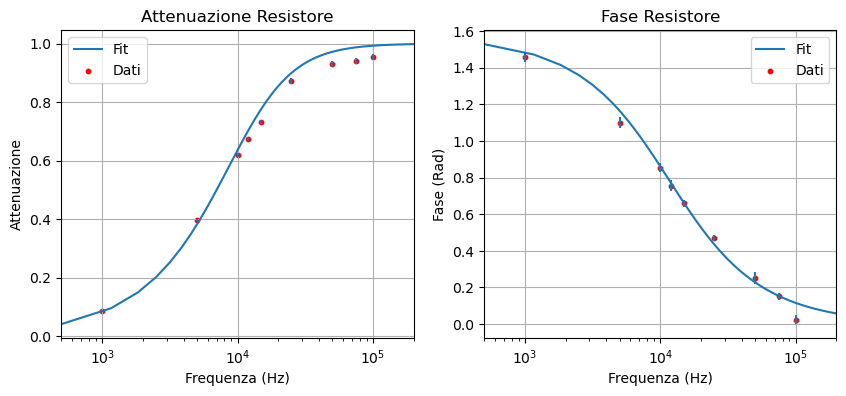

In [34]:
figg, axess = plt.subplots(1, 2, figsize=(10, 4))
F0a, F0p = m.values[0], m1.values[0]
errF0a, errF0p = m.errors[0], m1.errors[0]
x = np.linspace(min(F)*0.9,max(F)*1.1,min(F)-max(F))
#attenuazione
axess[0].plot(x,Ar(x,F0a), label = 'Fit')
axess[0].set_title('Attenuazione Resistore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'none')
axess[0].set_xlim(min(F)*0.9,max(F)*1.1)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")
#fase
axess[1].plot(x,phir(x,F0p), label = 'Fit')
axess[1].set_title('Fase Resistore')
axess[1].legend()
axess[1].set_xscale('log')
axess[1].grid(True)
axess[1].errorbar(F, phi, yerr=errphi, fmt = 'none')
axess[1].set_xlim(min(F)*0.9,max(F)*1.1)
axess[1].set_xlabel("Frequenza (Hz)")
axess[1].set_ylabel("Fase (Rad)")

In [36]:
print(F0p,"+/-",errF0p)
print(F0a,"+/-",errF0a)

11639.178979804032 +/- 250.91719092763284
12140.24877786523 +/- 74.2295629559088
